## Introducción a Machine Learning
Mientras más avanzamos hacia el mundo los grandes datos en la que podemos manejar cantidades masivas de datos todos los días, el mundo avanza simultáneamente hacia el **Machine Learning** y la IA. En los últimos años, con el aumento en la cantidad de datos que se producen cada día, el Machine learning ha visto un tremendo aumento en su importancia y prevalencia en casi todos los dominios. Especialmente en la actualidad, la mayoría de las empresas comerciales necesitan procesar una gran cantidad de datos para una mejor comprensión al convertir los datos en negocios a través del análisis para encontrar información significativa para hacer frente a los riesgos y oportunidades con el fin de tener una ventaja competitiva para el negocio. El aprendizaje automático juega un papel fundamental en este proceso.

El uso de **Apache Spark** implementando en grandes clústeres para el análisis de datos a gran escala mediante la creación de canales de aprendizaje automático unificados. Esto es posible con la biblioteca **MLlib de Spark** que facilita el **Machine Learning** en Spark. `PySpark MLlib` es la biblioteca de **Machine Learning** de Spark y actúa como un envoltorio sobre el núcleo de PySpark que proporciona un conjunto de API unificadas para el **Machine Learning** para realizar análisis de datos mediante la implementación distribuida de varios algoritmos de ML como clasificación, regresión, agrupación, etc.

Por otro lado **Databricks** ofrece un entorno de Spark gestionado creado tanto para la manipulación y tratamiento de datos como para la ingeniería de datos a escala. La ejecución de scripts de Python o R para **Machine Learning** a menudo es una limitación porque solo se ejecuta en una sola máquina, lo que significa que procesar y transformar los datos puede llevar mucho tiempo. A menudo, esto significa que los usuarios solo trabajan con un subconjunto más pequeño de datos o muestrean los datos, lo que puede conducir a resultados no tan precisos. Aquí es donde Spark entra en acción, porque ofrece una plataforma para la *ciencia de datos* que aprovecha el procesamiento paralelo.

## Pipeline en Machine Learning

[La importancia](https://www.oreilly.com/library/view/building-machine-learning/9781492053187/ch01.html) de **Pipeline en Machine Learning** radica en la automatización de los pasos del ciclo de vida del modelo. Cuando hay nuevos datos de entrenamiento disponibles, se debe activar un flujo de trabajo que incluya validación de datos, preprocesamiento, entrenamiento de modelos, análisis e implementación. Hemos observado que demasiados equipos de ciencia de datos realizan manualmente estos pasos, lo cual es costoso y también una fuente de errores.

Veamos algunos detalles de los beneficios de *Pipeline en Machine Learning*:
1. Capacidad para centrarse en nuevos modelos, sin mantener los modelos existentes. Muchos científicos de datos dedican sus días a mantener actualizados los modelos desarrollados previamente. Ejecutan scripts manualmente para preprocesar sus datos de entrenamiento, escriben scripts de implementación únicos o ajustan manualmente sus modelos. Los Pipelines automatizadas permiten a los científicos de datos desarrollar nuevos modelos, la parte divertida de nuestro trabajo. En última instancia, esto conducirá a una mayor satisfacción laboral y retención en un mercado laboral competitivo.
2. Prevención de errores. En los flujos de trabajo de aprendizaje automático manual, una fuente común de errores es un cambio en el paso de preprocesamiento después de entrenar un modelo. En este caso, implementaríamos un modelo con instrucciones de procesamiento diferentes a las que usamos para entrenar el modelo. Estos errores pueden ser realmente difíciles de depurar ya que aún es posible una inferencia del modelo, pero simplemente incorrecta. Con flujos de trabajo automatizados, estos errores se pueden prevenir.

3. Estandarización: Los Pipelines de aprendizaje automático estandarizadas mejoran la experiencia de un equipo de ciencia de datos. Debido a las configuraciones estandarizadas, los científicos de datos pueden incorporarse rápidamente o moverse entre equipos y encontrar los mismos entornos de desarrollo. Esto mejora la eficiencia y reduce el tiempo dedicado a configurar un nuevo proyecto. La inversión de tiempo en la configuración de Pipelines de aprendizaje automático también puede conducir a una tasa de retención mejorada.

En este primer cuaderno, explicaremos cómo crear un Pipelines de aprendizaje automático simple.

<center><img src="https://www.qubole.com/wp-content/uploads/2018/12/image15.png"></center>

# Random Forests
Este curso nos centraremos en la creación de bosques aleatorios **(*Random Forest*)** con PySpark para la clasificación. Aprenderemos sobre varios aspectos de ellos y cómo se llevan a cabo las predicciones; pero antes de saber más sobre bosques aleatorios, tenemos que aprender el bloque de construcción de RF que es un árbol de decisión (DT). También se utiliza un árbol de decisión para Clasificación/Regresión. pero en términos de precisión, los bosques aleatorios superan a los clasificadores DT debido a varias razones que veremos más adelante en el capítulo. Aprendamos más sobre los árboles de decisión.

## Decision Tree
Un árbol de decisión cae dentro de la categoría supervisada de aprendizaje automático y utiliza tablas de frecuencia para hacer las predicciones. Una ventaja de un árbol de decisión es que puede manejar tanto variables categóricas como numéricas. Como sugiere el nombre, opera en una especie de estructura de árbol y forma estas reglas en función de varias divisiones para finalmente hacer predicciones. El algoritmo que se utiliza en un árbol de decisión es ID3 desarrollado por J. R. Quinlan.

El nodo dividido superior desde donde se ramifica el árbol se conoce como nodo raíz; en el ejemplo anterior, Age es el nodo raíz. Los valores representados en círculos se conocen como nodos hoja o predicciones. Tomemos un conjunto de datos de muestra para comprender cómo funciona realmente un árbol de decisión.

Los datos que se muestran en la Tabla 6-1 contienen algunos datos de muestra de personas de diferentes grupos de edad y atributos. La decisión final que se debe tomar con base en estos atributos es si la prima del seguro debe ser más alta o no. Este es un caso típico de clasificación y lo clasificaremos usando un árbol de decisión. Tenemos cuatro columnas de entrada (Grupo de edad, Fumador, Condición médica, Nivel de salario).

|Age Group| Smoker| Medical Condition |Salary Level| Insurance Premium|
|---------|-------|-------------------|------------|------------------|
|Old| Yes| Yes| High| High|
|Teenager| Yes |Yes| Medium |High|
|Young |Yes |Yes| Medium |Low|
|Old |No |Yes| High| High|
|Young| Yes| Yes| High| Low|
|Teenager| No |Yes| Low| High|
|Teenager| No |No| Low| Low|
|Old |No| No |Low |High|
|Teenager |No |Yes| Medium |High|
|Young |No |Yes |Low |High|
|Young |Yes| No |High| Low|
|Teenager |Yes |No| Medium |Low|

## Entropy
El árbol de decisión crea subconjuntos de estos datos de tal manera que cada uno de esos subconjuntos contiene los mismos valores de clase (homogéneos); y para calcular la homogeneidad, usamos algo conocido como Entropía. Esto también se puede calcular utilizando un par de otras métricas como el índice de Gini y el error de clasificación, pero abordaremos la entropía para comprender cómo funcionan los árboles de decisión. La fórmula para calcular la entropía es

$$-p log_2 p –q log_2 q$$

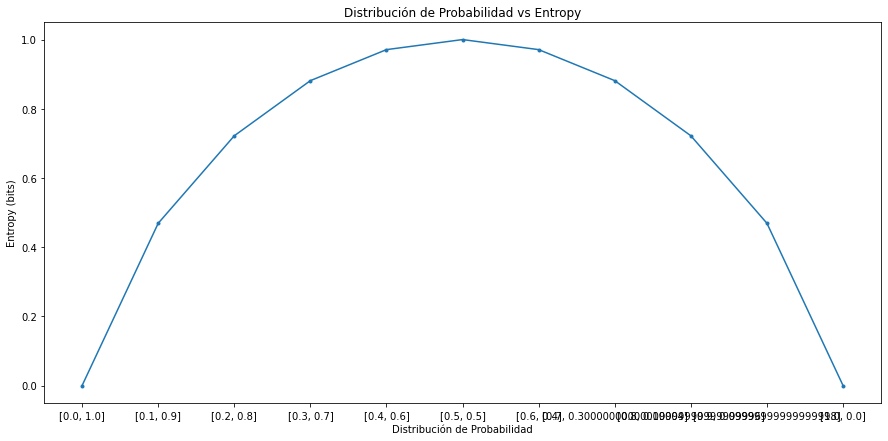

In [0]:
from math import log2
from matplotlib import pyplot
 
# calculate entropy
def entropy(events, ets=1e-15):
    return -sum([p * log2(p + ets) for p in events])
 
# Definimos las probabilidades
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1.0]
# creamos una distribución de probabilidad 
dists = [[p, 1.0 - p] for p in probs]

# Calcula la entropia para cada distribución 
ents = [entropy(d) for d in dists]
# Gráfica la distribución de probabilidad vs vs entropy

pyplot.figure(figsize=(15, 7))
pyplot.plot(probs, ents, marker='.')
pyplot.title('Distribución de Probabilidad vs Entropy')
pyplot.xticks(probs, [str(d) for d in dists])
pyplot.xlabel('Distribución de Probabilidad')
pyplot.ylabel('Entropy (bits)')
pyplot.show()

Si queremos calcular la entropía de nuestra variable objetivo (Premium de seguros), debemos calcular primero la probabilidad de cada clase y luego usar la fórmula anterior para calcular la entropía.

|Insurance Premium| -|
|-----------------|   |
|High (9) |Low (5)|

La probabilidad de una alta categoría es igual a 9/14 = 0.64

La probabilidad de una categoría baja es igual a 5/14 = 0.36
In order to build the decision tree, we need to calculate two kinds of
entropy:

$$Entropy = −p(High)log2(p(High)) − p(Low)log2(p(Low))$$
$$= −(0.64 ∗ log2(0.64)) − (0.36 ∗ log2(0.36))$$
$$= 0.94$$

$$Entropy=−p(High)log2(p(High))- p(Low)log2(p(Low))$$

$$=−(0.64 ∗ log2(0.64)) − (0.36 ∗ log2(0.36))$$

$$= 0.94$$

Para construir el árbol de decisiones, debemos calcular dos tipos de entropía:

1. Entropía de destino (Premium de seguros)
2. Entropía de destino con el atributo (ex. Premium de seguro - Fumador)

Ya hemos visto la entropía de un objetivo, por lo que calculemos una segunda entropía del objetivo con una función de entrada. Consideremos la característica del fumador, por ejemplo.

$$Entropy(Target, Feature) = ProbabilityFeature *EntropyCategories$$

|Entropy Calculation | Insurance Premium|
|--------------------|--------------------

|Feature|-Smoker|High (9)| Low (5)|
|-------|-------|--------|--------|
|Smoker|Yes (7)| 3| 4|
|(Feature)|No (7) |6 |1|



$$Entropy_{(Target, Smoker )} = P_{yes}\times Entropy_{(3,4)} + P_{no}\times Entropy_{(6,1)}$$

$$P_{yes}=\frac{7}{14}=0.5$$

$$P_{no}=\frac{7}{14}=0.5$$

$$Entropy_{(3,4)}=-\frac{3}{4}\times log_2 (\frac{3}{7})-\frac{4}{7}\times log_2 \frac{4}{7}=0.99$$

$$Entropy_{(6,1)}=-\frac{6}{7}\times log_2 (\frac{6}{7})-\frac{1}{7}\times log_2 \frac{1}{7}=0.59$$
Por lo tanto, la

$$Entropy_{(Target, Smoker )} = P_{yes}\times Entropy_{(3,4)} + P_{no}\times Entropy_{(6,1)}$$
$$=0.55\times 0.99+ 0.5\times 0.59=0.79$$

De manera similar, calculamos la entropía para todos los demás atributos:

$$Entropy_{(Target, Age\ Group)} = 0.69$$
$$Entropy_{(Target, Medical \ Condition)}= 0.89$$
$$Entropy_{(Target, Salary\ Level)}= 0.91$$

## Ganancia de información
La ganancia de información (IG) se utiliza para hacer las divisiones en los árboles de decisión. El atributo que ofrece la ganancia de información máxima se utiliza para dividir el subconjunto. La ganancia de la información dice que es la característica más importante de todos en términos de hacer predicciones. En términos de entropía, IG es el cambio en la entropía del objetivo antes de dividir y después de la división de una característica.

$$Information \ Gain = Emtropy_{(Target)}-Entropy_{(Target,Feature)}$$

$$IG_{smoker}= Emtropy_{(Target)}-Entropy_{(Target,smoker)}$$
$$= 0.94 − 0.79= 0.15$$

$$IG_{Age\ Group}= Emtropy_{(Target)}-Entropy_{(Target,Age\ Group)}$$
$$= 0.94 – 0.69 =0.25$$

## 1: Crea el objeto Sparksession.
Comenzamos importar Sparksession y creamos un nuevo objeto `Sparksession` para usar Spark.

In [0]:
#import SparkSession
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('random_forest_utopicode').getOrCreate()

## 2: Leer el conjunto de datos
Luego cargamos y leemos el conjunto de datos dentro de Spark usando Dataframe. Tenemos que asegurarnos de haber abierto PySpark desde la misma carpeta de directorio donde está disponible el conjunto de datos o, de lo contrario, debemos mencionar la ruta del directorio de la carpeta de datos.

## Información de datos
El conjunto de datos que vamos a utilizar para este ejemplo es un conjunto de datos de código abierto con unas pocas mil filas y seis columnas. Tenemos que usar cinco variables de entrada para predecir la variable objetivo utilizando el modelo forestal aleatorio.

In [0]:
filename = "/FileStore/tables/affairs.csv"
from pyspark.sql import functions as F
df = spark.read.csv(filename, header=True, inferSchema=True)

## 3:Análisis exploratorio de datos
En esta sección, profundizamos en el conjunto de datos al ver el conjunto de datos y validar la forma del conjunto de datos y varias medidas estadísticas de las variables. Comenzamos con comprobar la forma del conjunto de datos.

In [0]:
# Revisamo el tamaño de los datos 
print((df.count(),len(df.columns)))

(6366, 6)


Entonces, la salida anterior confirma el tamaño de nuestro conjunto de datos y luego podemos validar los tipos de datos de los valores de entrada para verificar si necesitamos cambiar/convertir algún tipo de datos de columnas.

In [0]:
#printSchema
df.printSchema()

root
 |-- rate_marriage: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- yrs_married: double (nullable = true)
 |-- children: double (nullable = true)
 |-- religious: integer (nullable = true)
 |-- affairs: integer (nullable = true)



Como podemos ver, no hay columnas categóricas que deban convertirse a forma numérica. Echemos un vistazo al conjunto de datos usando la función mostrar en Spark:

In [0]:
df.show(5)

+-------------+----+-----------+--------+---------+-------+
|rate_marriage| age|yrs_married|children|religious|affairs|
+-------------+----+-----------+--------+---------+-------+
|            5|32.0|        6.0|     1.0|        3|      0|
|            4|22.0|        2.5|     0.0|        2|      0|
|            3|32.0|        9.0|     3.0|        3|      1|
|            3|27.0|       13.0|     3.0|        1|      1|
|            4|22.0|        2.5|     0.0|        1|      1|
+-------------+----+-----------+--------+---------+-------+
only showing top 5 rows



Ahora podemos usar la función de describir para revisar las medidas estadísticas del conjunto de datos.

In [0]:
#Exploratory Data Analysis
df.describe().select('summary','rate_marriage','age','yrs_married','children','religious').show()

+-------+------------------+------------------+-----------------+------------------+------------------+
|summary|     rate_marriage|               age|      yrs_married|          children|         religious|
+-------+------------------+------------------+-----------------+------------------+------------------+
|  count|              6366|              6366|             6366|              6366|              6366|
|   mean| 4.109644989004084|29.082862079798932| 9.00942507068803|1.3968740182218033|2.4261702796104303|
| stddev|0.9614295945655025| 6.847881883668817|7.280119972766412| 1.433470828560344|0.8783688402641785|
|    min|                 1|              17.5|              0.5|               0.0|                 1|
|    max|                 5|              42.0|             23.0|               5.5|                 4|
+-------+------------------+------------------+-----------------+------------------+------------------+



Podemos observar que la edad promedio de las personas está cerca de 29 años, y se han casado durante 9 años.

Permítanos explorar columnas individuales para entender los datos en detalle más profundo. La función grupal utilizada junto con los conteos nos devuelve la frecuencia de cada una de las categorías en los datos.

In [0]:
df.groupBy('affairs').count().show()

+-------+-----+
|affairs|count|
+-------+-----+
|      1| 2053|
|      0| 4313|
+-------+-----+



Entonces, tenemos más del 33% de las personas que están involucradas en algún tipo de asunto extramarital de un número total de personas.

In [0]:
df.groupBy('rate_marriage').count().show()

+-------------+-----+
|rate_marriage|count|
+-------------+-----+
|            1|   99|
|            3|  993|
|            5| 2684|
|            4| 2242|
|            2|  348|
+-------------+-----+



La mayoría de las personas califica su matrimonio muy alto (4 o 5), y el resto lo califica en la parte baja. Profundicemos un poco más para comprender si la calificación de matrimonio está relacionada con la variable de aventura o no.

In [0]:
df.groupBy('rate_marriage','affairs').count().orderBy('rate_marriage','affairs','count',ascending=True).show()

+-------------+-------+-----+
|rate_marriage|affairs|count|
+-------------+-------+-----+
|            1|      0|   25|
|            1|      1|   74|
|            2|      0|  127|
|            2|      1|  221|
|            3|      0|  446|
|            3|      1|  547|
|            4|      0| 1518|
|            4|      1|  724|
|            5|      0| 2197|
|            5|      1|  487|
+-------------+-------+-----+



Claramente, las cifras indican un alto porcentaje de personas que tienen aventuras cuando califican sus matrimonios como bajos. Esto podría resultar ser una característica útil para la predicción. Exploraremos otras variables también de manera similar.

In [0]:
df.groupBy('religious','affairs').count().orderBy('religious','affairs','count',ascending=True).show()

+---------+-------+-----+
|religious|affairs|count|
+---------+-------+-----+
|        1|      0|  613|
|        1|      1|  408|
|        2|      0| 1448|
|        2|      1|  819|
|        3|      0| 1715|
|        3|      1|  707|
|        4|      0|  537|
|        4|      1|  119|
+---------+-------+-----+



Tenemos una historia similar de calificaciones sobre la perspectiva religiosa, así como la cantidad de personas que han calificado más bajo en características religiosas y un mayor porcentaje de participación en aventuras.

In [0]:
df.groupBy('children','affairs').count().orderBy('children','affairs','count',ascending=True).show()

+--------+-------+-----+
|children|affairs|count|
+--------+-------+-----+
|     0.0|      0| 1912|
|     0.0|      1|  502|
|     1.0|      0|  747|
|     1.0|      1|  412|
|     2.0|      0|  873|
|     2.0|      1|  608|
|     3.0|      0|  460|
|     3.0|      1|  321|
|     4.0|      0|  197|
|     4.0|      1|  131|
|     5.5|      0|  124|
|     5.5|      1|   79|
+--------+-------+-----+



La tabla anterior no indica claramente ninguna de las tendencias con respecto a la relación entre el número de hijos y las posibilidades de estar involucrado en una aventura. Usemos la función groupBy junto con la media para saber más sobre el conjunto de datos.

In [0]:
df.groupBy('affairs').mean().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------+
|affairs|avg(rate_marriage)|          avg(age)|  avg(yrs_married)|     avg(children)|    avg(religious)|avg(affairs)|
+-------+------------------+------------------+------------------+------------------+------------------+------------+
|      1|3.6473453482708234|30.537018996590355|11.152459814905017|1.7289332683877252| 2.261568436434486|         1.0|
|      0| 4.329700904242986| 28.39067934152562| 7.989334569904939|1.2388128912589844|2.5045212149316023|         0.0|
+-------+------------------+------------------+------------------+------------------+------------------+------------+



Por lo tanto, las personas que tienen asuntos tasa sus matrimonios bajos y un poco en el lado superior desde un punto de vista de la edad. También se han casado por un número mayor de años y son menos religiosos.

Otra herramienta que no ayuda a poder conocer más de nuestro datos es la función `display`. La función `display` trae incorporado la parte de análisis de visualización de datos, como veremos a continuación:

In [0]:
display(df)

rate_marriage,age,yrs_married,children,religious,affairs
5,32.0,6.0,1.0,3,0
4,22.0,2.5,0.0,2,0
3,32.0,9.0,3.0,3,1
3,27.0,13.0,3.0,1,1
4,22.0,2.5,0.0,1,1
4,37.0,16.5,4.0,3,1
5,27.0,9.0,1.0,1,1
4,27.0,9.0,0.0,2,1
5,37.0,23.0,5.5,2,1
5,37.0,23.0,5.5,2,1


## 4: Feature Engineering
Esta es la parte en la que creamos un solo vector que combina todas las características de entrada mediante el `VectorAssembler` de Spark.

In [0]:
from pyspark.ml.feature import VectorAssembler

<center><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*bfI5xK7OZ-_uSJCvtXFPUA.png"></center>

Necesitamos ensamblar todas las columnas de entrada en un solo vector que actuaría como la característica de entrada para el modelo. Entonces, seleccionamos las columnas de entrada que necesitamos usar para crear el vector de características único y nombramos el vector de salida como características.

In [0]:
from pyspark.ml.feature import VectorAssembler
df_assembler = VectorAssembler(inputCols=['rate_marriage', 'age', 'yrs_married', 'children', 'religious'], outputCol="features")
df = df_assembler.transform(df)

In [0]:
df.printSchema()

root
 |-- rate_marriage: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- yrs_married: double (nullable = true)
 |-- children: double (nullable = true)
 |-- religious: integer (nullable = true)
 |-- affairs: integer (nullable = true)
 |-- features: vector (nullable = true)



Como podemos ver, ahora tenemos una columna adicional llamada Características(features), que no es más que una combinación de todas las características de entrada representadas como un solo vector denso.

In [0]:
df.select(['features','affairs']).show(10,False)

+-----------------------+-------+
|features               |affairs|
+-----------------------+-------+
|[5.0,32.0,6.0,1.0,3.0] |0      |
|[4.0,22.0,2.5,0.0,2.0] |0      |
|[3.0,32.0,9.0,3.0,3.0] |1      |
|[3.0,27.0,13.0,3.0,1.0]|1      |
|[4.0,22.0,2.5,0.0,1.0] |1      |
|[4.0,37.0,16.5,4.0,3.0]|1      |
|[5.0,27.0,9.0,1.0,1.0] |1      |
|[4.0,27.0,9.0,0.0,2.0] |1      |
|[5.0,37.0,23.0,5.5,2.0]|1      |
|[5.0,37.0,23.0,5.5,2.0]|1      |
+-----------------------+-------+
only showing top 10 rows



Seleccionemos solo la columna de características como entrada y la columna de asuntos como salida para entrenar el modelo forestal aleatorio.

In [0]:
# Seleccionamos los datos para el modelo 
model_df=df.select(['features','affairs'])

## 5: Dividiendo el conjunto de datos
Tenemos que dividir el conjunto de datos en entrenamiento y pruebe los conjuntos de datos para capacitar y evaluar el rendimiento del modelo *Random. Lo dividimos en una proporción de 75/25 y entrenamos nuestro modelo en el 75% del conjunto de datos. Podemos imprimir la forma del tren y los datos de prueba para validar el tamaño.

In [0]:
train_df,test_df=model_df.randomSplit([0.75,0.25])

In [0]:
train_df.count()

Out[34]: 4779

In [0]:
display(train_df)

features,affairs
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 17.5, 0.5, 0.0, 2.0))",0
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 22.0, 2.5, 0.0, 1.0))",1
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 22.0, 2.5, 0.0, 1.0))",1
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 22.0, 2.5, 0.0, 2.0))",1
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 22.0, 2.5, 1.0, 1.0))",1
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 22.0, 2.5, 1.0, 1.0))",1
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 22.0, 2.5, 1.0, 2.0))",0
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 22.0, 2.5, 1.0, 2.0))",1
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 22.0, 2.5, 1.0, 3.0))",0
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 22.0, 2.5, 1.0, 3.0))",1


In [0]:
train_df.groupBy('affairs').count().show()

+-------+-----+
|affairs|count|
+-------+-----+
|      1| 1542|
|      0| 3237|
+-------+-----+



Esto garantiza que tengamos valores establecidos equilibrados para la clase objetivo ('asuntos') en los conjuntos de entrenamiento y pruebas.

In [0]:
test_df.groupBy('affairs').count().show()

+-------+-----+
|affairs|count|
+-------+-----+
|      1|  503|
|      0| 1030|
+-------+-----+



## 6: Construir y entrenar modelo de bosque aleatorio
En esta parte, construimos y entrenamos el modelo de bosque aleatorio utilizando características, como la entrada y el estado como la columna de salida.

In [0]:
from pyspark.ml.classification import RandomForestClassifier

In [0]:
rf_classifier=RandomForestClassifier(labelCol='affairs',numTrees=50).fit(train_df)

Hay muchos hiperparaméteres que se pueden configurar para modificar el rendimiento del modelo, pero estamos elegiendo los de deaf a excepción de uno, excepto por uno que es el número de árboles de decisión que queremos construir.

## 7: Evaluación de datos de prueba
Una vez que hemos entrenado nuestro modelo en el conjunto de datos de entrenamiento, podemos evaluar su desempeño en el conjunto de prueba.

In [0]:
rf_predictions=rf_classifier.transform(test_df)

In [0]:
rf_predictions.show()

+--------------------+-------+--------------------+--------------------+----------+
|            features|affairs|       rawPrediction|         probability|prediction|
+--------------------+-------+--------------------+--------------------+----------+
|[1.0,17.5,0.5,0.0...|      0|[33.3085219136520...|[0.66617043827304...|       0.0|
|[1.0,22.0,2.5,1.0...|      0|[18.2487206474062...|[0.36497441294812...|       1.0|
|[1.0,22.0,2.5,1.0...|      1|[18.2487206474062...|[0.36497441294812...|       1.0|
|[1.0,22.0,2.5,1.0...|      0|[18.5278095629165...|[0.37055619125833...|       1.0|
|[1.0,27.0,6.0,1.0...|      0|[19.1060861732743...|[0.38212172346548...|       1.0|
|[1.0,27.0,6.0,1.0...|      1|[19.4611252347845...|[0.38922250469569...|       1.0|
|[1.0,27.0,6.0,2.0...|      1|[19.5368795076348...|[0.39073759015269...|       1.0|
|[1.0,27.0,9.0,4.0...|      0|[14.8364750415311...|[0.29672950083062...|       1.0|
|[1.0,27.0,13.0,2....|      1|[14.5102437398427...|[0.29020487479685...|    

La primera columna en la tabla de predicciones es la de las características de entrada de los datos de prueba. La segunda columna es la etiqueta o salida real de los datos de prueba. La tercera columna (RawPrediction) representa la medida de confianza para ambos resultados posibles. La cuarta columna es la de la probabilidad condicional de cada etiqueta de clase, y la columna final es la predicción por el clasificador de bosques aleatorios. Podemos aplicar una función grupal en la columna de predicción para averiguar el número de predicciones realizadas para las clases positivas y negativas. .

In [0]:
rf_predictions.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0| 1303|
|       1.0|  284|
+----------+-----+



In [0]:
rf_predictions.select(['probability','affairs','prediction']).show(10,False)

+----------------------------------------+-------+----------+
|probability                             |affairs|prediction|
+----------------------------------------+-------+----------+
|[0.4210807548531431,0.5789192451468569] |0      |1.0       |
|[0.35956936682589097,0.6404306331741091]|0      |1.0       |
|[0.3873575532946483,0.6126424467053517] |1      |1.0       |
|[0.3585639371435366,0.6414360628564633] |0      |1.0       |
|[0.34602357434176234,0.6539764256582377]|0      |1.0       |
|[0.34602357434176234,0.6539764256582377]|1      |1.0       |
|[0.35090888920156454,0.6490911107984354]|1      |1.0       |
|[0.28874698868279736,0.7112530113172026]|1      |1.0       |
|[0.3120205691376177,0.6879794308623822] |1      |1.0       |
|[0.2798418524048383,0.7201581475951617] |1      |1.0       |
+----------------------------------------+-------+----------+
only showing top 10 rows



Para evaluar estas predicciones, importaremos el `classificationEvaluators`.

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

## Accuracy

In [0]:
rf_accuracy=MulticlassClassificationEvaluator(labelCol='affairs',metricName='accuracy').evaluate(rf_predictions)
print('El accuracy de RF en los datos de prueba es {0:.0%}'.format(rf_accuracy))

El accuracy de RF en los datos de prueba es 72%


## Precision

In [0]:
rf_precision=MulticlassClassificationEvaluator(labelCol='affairs',metricName='weightedPrecision').evaluate(rf_predictions)
print('El accuracy de RF en los datos de prueba es {0:.0%}'.format(rf_accuracy))

El accuracy de RF en los datos de prueba es 72%


## AUC

In [0]:
rf_auc=BinaryClassificationEvaluator(labelCol='affairs').evaluate(rf_predictions)
print("El área bajo la curva es:", rf_auc*100)

El área bajo la curva es: 75.97856451741973


Como se mencionó en la parte anterior, RF da la importancia de cada característica en términos de poder predictivo, y es muy útil descubrir las variables críticas que contribuyen más a las predicciones.

In [0]:
# Feature importance
rf_classifier.featureImportances

Out[55]: SparseVector(5, {0: 0.6666, 1: 0.0287, 2: 0.1949, 3: 0.0518, 4: 0.0579})

Usamos cinco características y la importancia se puede averiguar usando la función de importancia de características. Para saber qué característica de entrada se asigna a qué valores de índice, podemos usar información de metadatos.

In [0]:
df.schema["features"].metadata["ml_attr"]["attrs"]

Out[56]: {'numeric': [{'idx': 0, 'name': 'rate_marriage'},
  {'idx': 1, 'name': 'age'},
  {'idx': 2, 'name': 'yrs_married'},
  {'idx': 3, 'name': 'children'},
  {'idx': 4, 'name': 'religious'}]}

Por lo tanto, Rate_marriage es la característica más importante de un punto de vista de predicción seguido de YRS_Married. La variable menos significativa parece ser la edad.

## 8: Guardar el modelo
A veces, después de entrenar el modelo, solo necesitamos llamar al modelo para predicciones y, por lo tanto, tiene mucho sentido conservar el objeto del modelo y reutilizarlo para predicciones. Hay dos partes en esto.
1. Guarde el modelo ML
2. Cargue el modelo ML

In [0]:
basePath = "/tmp/Naren"


In [0]:
rf_classifier.save(basePath+"RF_model")

In [0]:
from pyspark.ml.classification import RandomForestClassificationModel

De esta manera, guardamos el modelo como objeto local. El siguiente paso es cargar el modelo nuevamente para predicciones

In [0]:
rf=RandomForestClassificationModel.load(basePath+"RF_model")

In [0]:
model_preditions=rf.transform(test_df)

In [0]:
display(model_preditions)

features,affairs,rawPrediction,probability,prediction
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 22.0, 2.5, 1.0, 2.0))",0,"Map(vectorType -> dense, length -> 2, values -> List(21.054037742657155, 28.945962257342845))","Map(vectorType -> dense, length -> 2, values -> List(0.4210807548531431, 0.5789192451468569))",1.0
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 27.0, 2.5, 0.0, 1.0))",0,"Map(vectorType -> dense, length -> 2, values -> List(17.978468341294548, 32.021531658705456))","Map(vectorType -> dense, length -> 2, values -> List(0.35956936682589097, 0.6404306331741091))",1.0
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 27.0, 2.5, 0.0, 2.0))",1,"Map(vectorType -> dense, length -> 2, values -> List(19.36787766473242, 30.63212233526759))","Map(vectorType -> dense, length -> 2, values -> List(0.3873575532946483, 0.6126424467053517))",1.0
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 27.0, 6.0, 0.0, 2.0))",0,"Map(vectorType -> dense, length -> 2, values -> List(17.928196857176832, 32.071803142823164))","Map(vectorType -> dense, length -> 2, values -> List(0.3585639371435366, 0.6414360628564633))",1.0
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 27.0, 6.0, 1.0, 3.0))",0,"Map(vectorType -> dense, length -> 2, values -> List(17.301178717088114, 32.69882128291187))","Map(vectorType -> dense, length -> 2, values -> List(0.34602357434176234, 0.6539764256582377))",1.0
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 27.0, 6.0, 1.0, 3.0))",1,"Map(vectorType -> dense, length -> 2, values -> List(17.301178717088114, 32.69882128291187))","Map(vectorType -> dense, length -> 2, values -> List(0.34602357434176234, 0.6539764256582377))",1.0
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 27.0, 6.0, 2.0, 3.0))",1,"Map(vectorType -> dense, length -> 2, values -> List(17.545444460078222, 32.45455553992176))","Map(vectorType -> dense, length -> 2, values -> List(0.35090888920156454, 0.6490911107984354))",1.0
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 27.0, 13.0, 2.0, 2.0))",1,"Map(vectorType -> dense, length -> 2, values -> List(14.437349434139868, 35.56265056586013))","Map(vectorType -> dense, length -> 2, values -> List(0.28874698868279736, 0.7112530113172026))",1.0
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 32.0, 13.0, 1.0, 3.0))",1,"Map(vectorType -> dense, length -> 2, values -> List(15.601028456880881, 34.3989715431191))","Map(vectorType -> dense, length -> 2, values -> List(0.3120205691376177, 0.6879794308623822))",1.0
"Map(vectorType -> dense, length -> 5, values -> List(1.0, 32.0, 16.5, 2.0, 2.0))",1,"Map(vectorType -> dense, length -> 2, values -> List(13.992092620241912, 36.00790737975809))","Map(vectorType -> dense, length -> 2, values -> List(0.2798418524048383, 0.7201581475951617))",1.0


In [0]:
model_preditions.show()

+--------------------+-------+--------------------+--------------------+----------+
|            features|affairs|       rawPrediction|         probability|prediction|
+--------------------+-------+--------------------+--------------------+----------+
|[1.0,22.0,2.5,1.0...|      0|[21.0540377426571...|[0.42108075485314...|       1.0|
|[1.0,27.0,2.5,0.0...|      0|[17.9784683412945...|[0.35956936682589...|       1.0|
|[1.0,27.0,2.5,0.0...|      1|[19.3678776647324...|[0.38735755329464...|       1.0|
|[1.0,27.0,6.0,0.0...|      0|[17.9281968571768...|[0.35856393714353...|       1.0|
|[1.0,27.0,6.0,1.0...|      0|[17.3011787170881...|[0.34602357434176...|       1.0|
|[1.0,27.0,6.0,1.0...|      1|[17.3011787170881...|[0.34602357434176...|       1.0|
|[1.0,27.0,6.0,2.0...|      1|[17.5454444600782...|[0.35090888920156...|       1.0|
|[1.0,27.0,13.0,2....|      1|[14.4373494341398...|[0.28874698868279...|       1.0|
|[1.0,32.0,13.0,1....|      1|[15.6010284568808...|[0.31202056913761...|    

## Pipeline

In [0]:
data = spark.read.csv(filename, header=True, inferSchema=True)

In [0]:
# Initially split our dataset between training and test datasets
(train, test) = data.randomSplit([0.8, 0.2], seed=12345)

# Cache the training and test datasets
train.cache()
test.cache()

# Print out dataset counts
print("Total filas: %s, Total Training: %s, Total Test: %s" % (df.count(), train.count(), test.count()))

Total filas: 6366, Total Training: 5095, Total Test: 1271


In [0]:
from pyspark.ml.feature import VectorAssembler
df_assembler = VectorAssembler(inputCols=['rate_marriage', 'age', 'yrs_married', 'children', 'religious'], outputCol="features")

In [0]:
df_assembler

Out[118]: VectorAssembler_6224f1bed995

In [0]:
from pyspark.ml import Pipeline
# Creamos nuestro pipeline stages

modelo_rf=RandomForestClassifier(labelCol='affairs',featuresCol = "features",numTrees=500)

pipe = Pipeline(stages=[df_assembler, modelo_rf])

In [0]:
modelo_pipe = pipe.fit(train)
print(modelo_pipe)

PipelineModel_00f52066b431


### Usar BinaryClassificationEvaluator
Determine la precisión del modelo revisando el areaUnderPR y el areaUnderROC

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Use BinaryClassificationEvaluator to evaluate our model
evaluatorPR = BinaryClassificationEvaluator(labelCol = 'affairs', rawPredictionCol = "prediction", metricName = "areaUnderPR")
evaluatorAUC = BinaryClassificationEvaluator(labelCol = 'affairs', rawPredictionCol = "prediction", metricName = "areaUnderROC")

### Configurar Cross Validation
Para probar diferentes parámetros para mejorar potencialmente nuestro modelo, usaremos CrossValidator junto con ParamGridBuilder para automatizar la prueba de diferentes parámetros.

Tenga en cuenta que estamos utilizando evaluatorPR como nuestro evaluador, ya que la curva Precision-Recall suele ser mejor para una distribución desequilibrada.

In [0]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Build the grid of different parameters
paramGrid = ParamGridBuilder() \
    .addGrid(modelo_rf.maxDepth, [5, 10, 15]) \
    .addGrid(modelo_rf.maxBins, [10, 20, 30]) \
    .build()

# Build out the cross validation
crossval = CrossValidator(estimator = modelo_rf,
                          estimatorParamMaps = paramGrid,
                          evaluator = evaluatorPR,
                          numFolds = 3)  

pipelineCV = Pipeline(stages=[df_assembler, crossval])

# Train the model using the pipeline, parameter grid, and preceding BinaryClassificationEvaluator
cvModel_u = pipelineCV.fit(train)

### Revisar resultados
Revise las métricas areaUnderPR (área bajo la curva de recuperación de precisión) y areaUnderROC (área bajo la característica operativa del receptor) o AUC (área bajo la curva).

In [0]:
# Cree el mejor modelo (conjuntos de datos de entrenamiento y prueba)
train_pred = cvModel_u.transform(train)
test_pred = cvModel_u.transform(test)

# Evaluar el moelo con los datos de entrenamiento
pr_train = evaluatorPR.evaluate(train_pred)
auc_train = evaluatorAUC.evaluate(train_pred)

# Evaluar el modelo con los datos de prueba
pr_test = evaluatorPR.evaluate(test_pred)
auc_test = evaluatorAUC.evaluate(test_pred)

# Mostrar resultado PR y AUC 
print("PR train:", pr_train)
print("AUC train:", auc_train)
print("PR test:", pr_test)
print("AUC test:", auc_test)

PR train: 0.5370336916687941
AUC train: 0.628415849310864
PR test: 0.5157748346557589
AUC test: 0.634245283018868


### MLflow

In [0]:
# Configure MLflow Experiment
mlflow_experiment_id = 866112

# Including MLflow
import mlflow
import mlflow.spark

In [0]:
with mlflow.start_run() as run:
    # Log Parameters and metrics
    mlflow.log_param("balanced", "no")
    mlflow.log_metric("PR train", pr_train)
    mlflow.log_metric("AUC train", auc_train)
    mlflow.log_metric("PR test", pr_test)
    mlflow.log_metric("AUC test", auc_test)
  
  # Log model
    mlflow.spark.log_model(modelo_pipe, "model")
  
 

2023/02/15 23:35:29 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
2023/02/15 23:36:45 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: dbfs:/databricks/mlflow-tracking/4443453691481069/0a2632f9c4824888a0773435946714ab/artifacts/model/sparkml, flavor: spark), fall back to return ['pyspark==3.3.0']. Set logging level to DEBUG to see the full traceback.


---------------------------------------------------------------------------
FileNotFoundError                         Traceback (most recent call last)
/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/mlflow/store/artifact/databricks_artifact_repo.py in _signed_url_upload_file(self, credentials, local_file)
    312             # Putting an empty file in a request by reading file bytes gives 501 error.
--> 313             if os.stat(local_file).st_size == 0:
    314                 with rest_utils.cloud_storage_http_request(

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/imagen/Naren'

During handling of the above exception, another exception occurred:

MlflowException                           Traceback (most recent call last)
<command-1279062648692469> in <cell line: 1>()
     11 
     12   # Log Confusion matrix
---> 13     mlflow.log_artifact(basePath1)

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/m

## Conclusión
Hemos repasado el proceso de comprensión de los componentes básicos de Random Forests y la creación de un modelo ML en PySpark para la clasificación junto con métricas de evaluación como precisión, precisión y auc. También cubrimos cómo guardar el objeto del modelo ML localmente y reutilizarlo para predicciones.

https://medium.com/@nutanbhogendrasharma/role-of-onehotencoder-and-pipelines-in-pyspark-ml-feature-part-2-3275767e74f0